In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from sklearn.model_selection import GridSearchCV,StratifiedKFold

### (a)

In [2]:
data = pd.read_excel('default of credit card clients.xls',index_col = 'ID')

In [3]:
data.head()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
ID,,,,,,,,,,,,,,,,,,,,,
1,20000,2,2,1,24,2,2,-1,-1,-2,...,0,0,0,0,689,0,0,0,0,1
2,120000,2,2,2,26,-1,2,0,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
3,90000,2,2,2,34,0,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
4,50000,2,2,1,37,0,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
5,50000,1,2,1,57,-1,0,-1,0,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30000 entries, 1 to 30000
Data columns (total 24 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   LIMIT_BAL                   30000 non-null  int64
 1   SEX                         30000 non-null  int64
 2   EDUCATION                   30000 non-null  int64
 3   MARRIAGE                    30000 non-null  int64
 4   AGE                         30000 non-null  int64
 5   PAY_0                       30000 non-null  int64
 6   PAY_2                       30000 non-null  int64
 7   PAY_3                       30000 non-null  int64
 8   PAY_4                       30000 non-null  int64
 9   PAY_5                       30000 non-null  int64
 10  PAY_6                       30000 non-null  int64
 11  BILL_AMT1                   30000 non-null  int64
 12  BILL_AMT2                   30000 non-null  int64
 13  BILL_AMT3                   30000 non-null  int64
 14  BILL_A

In [5]:
data.shape

(30000, 24)

In [6]:
data.describe()

,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment next month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,-0.266200,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,1.133187,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [7]:
data.nunique()

LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default payment next month        2
dtype: int64

In [8]:
data['default payment next month'].unique()

array([1, 0])

### (b)

In [9]:
y = data['default payment next month']
X = data.drop('default payment next month',axis=1)

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier

In [12]:
clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=2, random_state=0)

In [13]:
y_pred = clf.predict(X_test)

In [14]:
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score

In [15]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      7742
           1       0.69      0.17      0.27      2158

    accuracy                           0.80      9900
   macro avg       0.75      0.58      0.58      9900
weighted avg       0.78      0.80      0.75      9900



In [16]:
accuracy_score(y_test, y_pred)

0.8029292929292929

### (c)

In [17]:
best_parameters = {'max_depth': np.arange(2,11)}
model = GridSearchCV(estimator=RandomForestClassifier(), param_grid=best_parameters,verbose=1,n_jobs=1, return_train_score=True,scoring= 'accuracy', cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=17))
model.fit(X, y)
model.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


{'max_depth': 8}

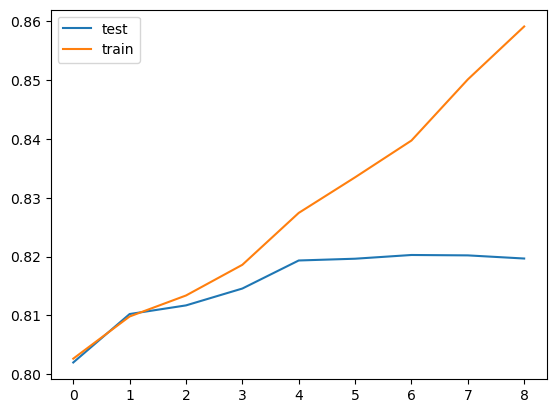

In [18]:
test_scores = model.cv_results_['mean_test_score']
train_scores = model.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

### (d)

In [19]:
best_parameters = {'n_estimators': np.arange(2,11)}
model = GridSearchCV(estimator=RandomForestClassifier(), param_grid=best_parameters,verbose=1,n_jobs=1, return_train_score=True,scoring= 'accuracy', cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=17))
model.fit(X, y)
model.best_params_

Fitting 3 folds for each of 9 candidates, totalling 27 fits


{'n_estimators': 8}

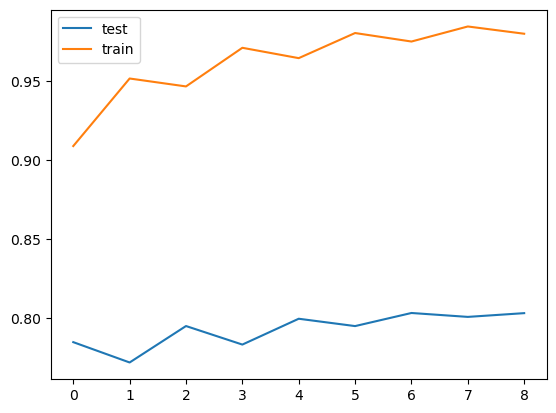

In [20]:
test_scores = model.cv_results_['mean_test_score']
train_scores = model.cv_results_['mean_train_score'] 

plt.plot(test_scores, label='test')
plt.plot(train_scores, label='train')
plt.legend(loc='best')
plt.show()

In [22]:
# df_results = pd.DataFrame(model.cv_results_)
# df_results

### (e)

In [33]:
best_parameters = {'max_depth': np.arange(2,11),'n_estimators': np.arange(2,11),'min_samples_leaf': np.arange(2,11),'min_samples_split': np.arange(2,11),'max_features': np.arange(2,11)}
model = GridSearchCV(estimator=clf, param_grid=best_parameters,verbose=1, scoring= 'accuracy', cv=StratifiedKFold(n_splits=3, shuffle=True, random_state=17))
model.fit(X_train, y_train)
model.best_params_

Fitting 3 folds for each of 59049 candidates, totalling 177147 fits


{'max_depth': 3,
 'max_features': 9,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 5}

In [34]:
df_results = pd.DataFrame(model.cv_results_)
df_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_min_samples_leaf,param_min_samples_split,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.012134,0.000346,0.003358,0.000073,2,2,2,2,2,"{'max_depth': 2, 'max_features': 2, 'min_sampl...",0.814925,0.806866,0.805373,0.809055,0.004196,49466
1,0.032852,0.024042,0.003777,0.000048,2,2,2,2,3,"{'max_depth': 2, 'max_features': 2, 'min_sampl...",0.814328,0.806119,0.803582,0.808010,0.004586,51768
2,0.021450,0.002172,0.004294,0.000109,2,2,2,2,4,"{'max_depth': 2, 'max_features': 2, 'min_sampl...",0.806269,0.804030,0.800299,0.803532,0.002463,55578
3,0.024993,0.000088,0.004410,0.000046,2,2,2,2,5,"{'max_depth': 2, 'max_features': 2, 'min_sampl...",0.797313,0.800149,0.794179,0.797214,0.002438,58789
4,0.030087,0.000343,0.004822,0.000029,2,2,2,2,6,"{'max_depth': 2, 'max_features': 2, 'min_sampl...",0.801642,0.799552,0.799254,0.800149,0.001062,57695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59044,0.266078,0.003325,0.006652,0.000029,10,10,10,10,6,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.819701,0.812687,0.816716,0.816368,0.002874,23104
59045,0.307863,0.002833,0.007319,0.000030,10,10,10,10,7,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.821940,0.813433,0.818060,0.817811,0.003478,13968
59046,0.350884,0.001423,0.007913,0.000048,10,10,10,10,8,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.821791,0.812836,0.818955,0.817861,0.003737,13386
59047,0.394300,0.002229,0.008592,0.000087,10,10,10,10,9,"{'max_depth': 10, 'max_features': 10, 'min_sam...",0.821940,0.812985,0.817761,0.817562,0.003659,15757


### (f)

In [35]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

Best Parameters:
{'max_depth': 3,
 'max_features': 9,
 'min_samples_leaf': 10,
 'min_samples_split': 2,
 'n_estimators': 5}

In [36]:
clf_best = RandomForestClassifier(max_depth = 3, max_features = 9, min_samples_leaf = 10, min_samples_split = 2, n_estimators = 5, random_state=0)
clf_best.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, max_features=9, min_samples_leaf=10,
                       n_estimators=5, random_state=0)

In [37]:
y_pred_best = clf.predict(X_test)

In [38]:
accuracy_score(y_test,y_pred_best)

0.8029292929292929

In [39]:
print(classification_report(y_test,y_pred_best))

              precision    recall  f1-score   support

           0       0.81      0.98      0.89      7742
           1       0.69      0.17      0.27      2158

    accuracy                           0.80      9900
   macro avg       0.75      0.58      0.58      9900
weighted avg       0.78      0.80      0.75      9900

